In [1]:
# package for listing and algebra
import numpy as np

# package for data processing
import pandas as pd

# package for plots
import matplotlib.pyplot as plt
%matplotlib inline

# package for regression analysis
import statsmodels.api as sm
from math import sqrt
import os

# package for statistics

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

# package for more plotting
import seaborn as sns

# import a specific color palette and style guide
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score

from IPython.display import display, FileLink

# Cool command to get rid of useless warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn



In [2]:
# I will import the data using a csv importation

data = pd.read_csv("/Users/hunterromano/Desktop/BlackFriday.csv")

In [3]:
# Check to see that the data has been imported correctly

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Looks good, now we will take a closer look at the data 

data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
# Occupation is an interesting variable, out of curiosty let's look at that variable and how many data points belong in each

data['Occupation'].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [6]:
# Let us look for missing values

training_na = (data.isnull().sum() / len(data)) * 100
training_na = training_na.drop(training_na[training_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :training_na})
missing_data.head()

,Missing Ratio
Product_Category_3,69.441029
Product_Category_2,31.062713


In [7]:
# I want to see if the value 0 is used at all within product categories 2 and 3

data.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [8]:
# We want to verify that 0 isn't present in the 3rd product category as well.

data.Product_Category_3.value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [9]:
# 0 can fill our na because it is not being used to describe another product category

data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

data["Product_Category_2"] = data["Product_Category_2"].fillna(0)

In [10]:
# Now to check if we took care of all our missing data

training_na = (data.isnull().sum() / len(data)) * 100
training_na = training_na.drop(training_na[training_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :training_na})
missing_data.head()

,Missing Ratio


In [11]:
# looks good, now let's look at each atrribute and what type of data is contained in each

data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [12]:
# Let's seperate them into continuous and categorical variable groups

continuous_data = [
    'Purchase',
    
]


# By default the other attributes are categorical
categorical_data = [col for col in data.columns if col not in continuous_data]

# check to make sure I did that correctly
categorical_data

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [13]:
# Check the continuous side

continuous_data

['Purchase']

# Visualizations & Analysis of Data

# 1 | Gender Analysis

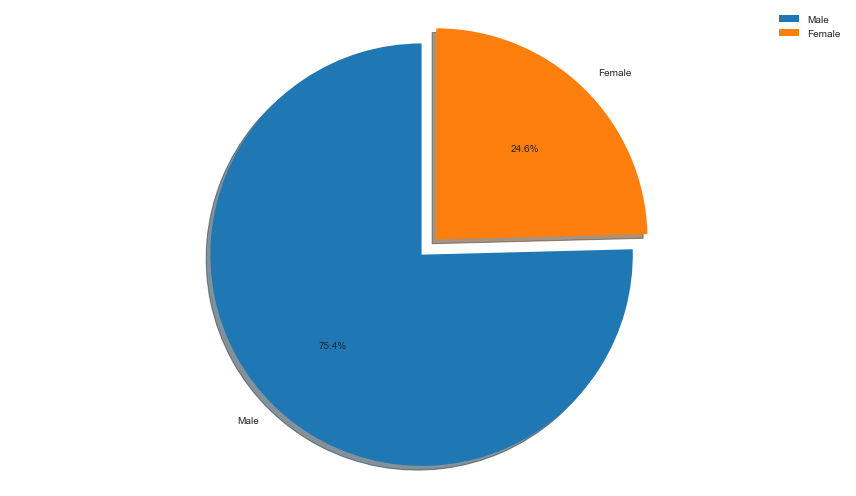

In [18]:
# First we will look at male vs female customers in the data set.

explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio will make the pie be drawn as a circle.
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

So 75% of black Friday purchases were made by males.

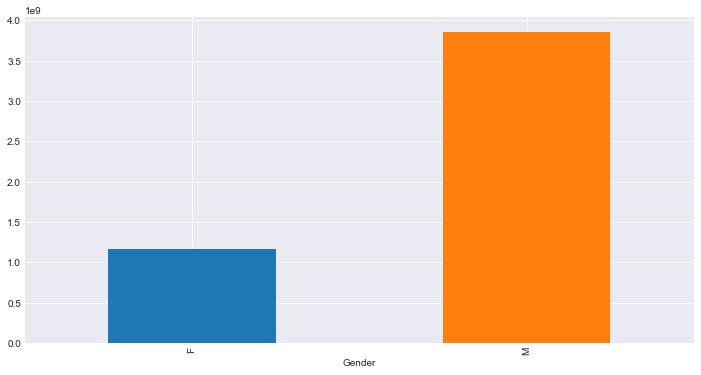

In [19]:
# This next graph will provide a visualization of the purchasing power of men and that of women.  
# We will do this by looking at the total purchase value of each gender group


def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    data.groupby(group)[column].sum().sort_values().plot(plot)
    
plot('Gender','Purchase','bar')

- The Black Friday purchaser is much more liklely to be male and the male customer will spend much more.
- In our data set there were approxamitely 400,000 men and 140,000 women.
- Looks liek the data set has about 1 billion in sales to women and 4 billion in sales to men;.

# 2 | Customer Age

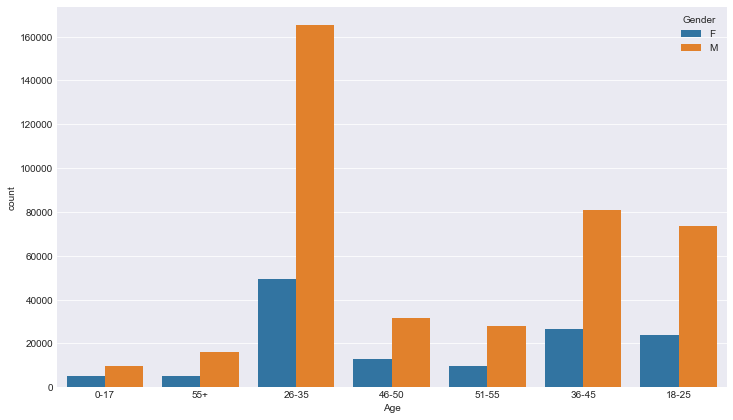

In [20]:
# This first graph will allow us to see the number of male and female customers within each age range within "Age" data field.

fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Age'],hue=data['Gender'])

A quick glance shows how vital the 26-35 age range with black Friday sales.

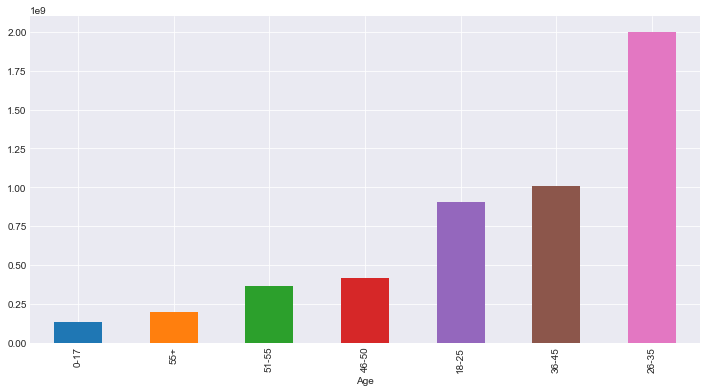

In [23]:
# To have a more general view of age ranges with gender remove we will produce the follow graph.

plot('Age','Purchase','bar')

- The 26-35 age group provides the most customers almost doubling any other age group
- Customers between 18 and 35 provide about 3 billion in revenue
- If you expand the age range from 18 to 45 the total Black Friday spend nears 4 billion in sales.

# 3 | City

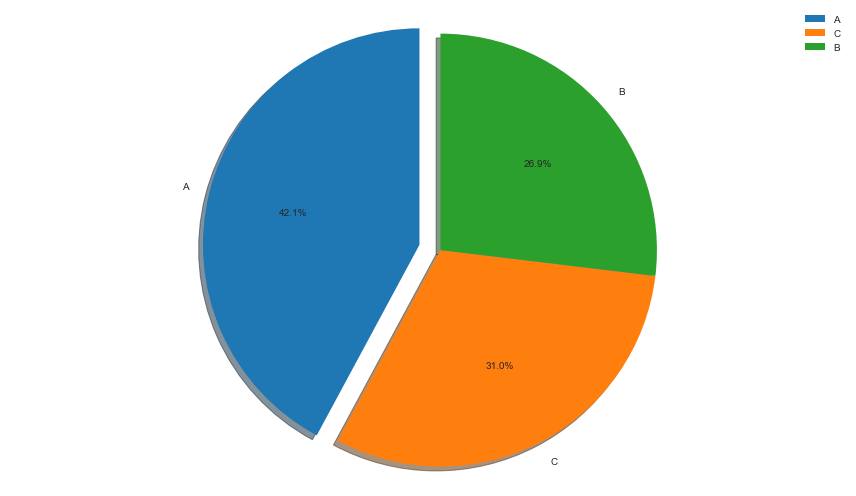

In [24]:
# The data set contains 3 cities that we assume are large consideirng their large Black Friday sales.
# We will start with a simple pie chart to look at sales per city.

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['City_Category'].value_counts(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

City A clearly seems to have a larger Black Friday market accounting for 42% of purchases within the data.

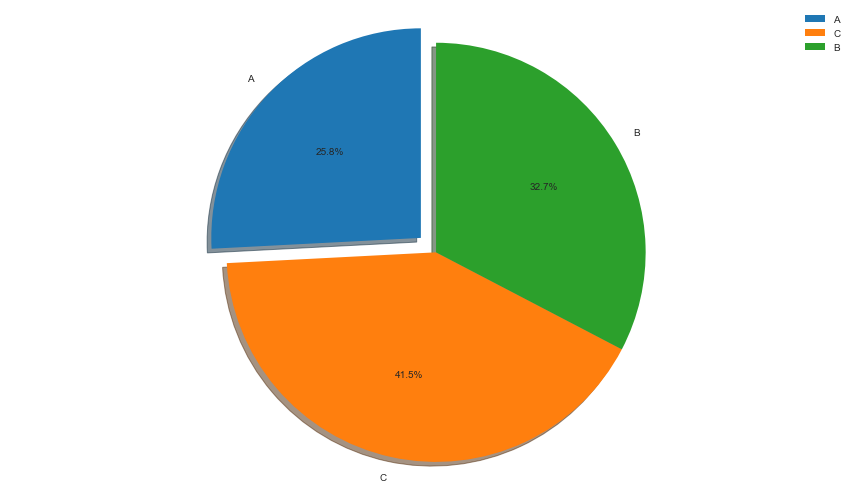

In [26]:
# Volume isn't eveything, so we made another pie graph but analyzing total customer spend this time.

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Interesting to note that City A had the least amount of customer spend even though it sold the most items.
City C made the most revenue.  If we new proft data we could determine which in this case is better but we will assume revenue is most important for now.

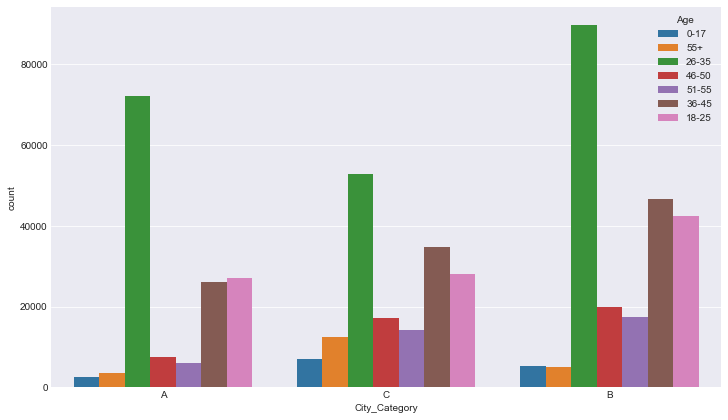

In [27]:
# To dive deeper into the cities we will look at the age distribution within them.

fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['City_Category'],hue=data['Age'])

This chart provides unexpected revelations.  City B has the highest number of buyers in our desired age range, and overall.  Thier potential purchasing power in theory is therefore higher but higher sales figured were attained in City C even with their, the lowest number of target age range buyers.

- Interesting to note that the most items bought did not correlate with the most revenue.  
- Given City B's large target market though and their willingness to buy maybe they can be targeted to shift their cosumption to the higher priced items that appear to be selling in the other cities.

# 4 | Marital Status 

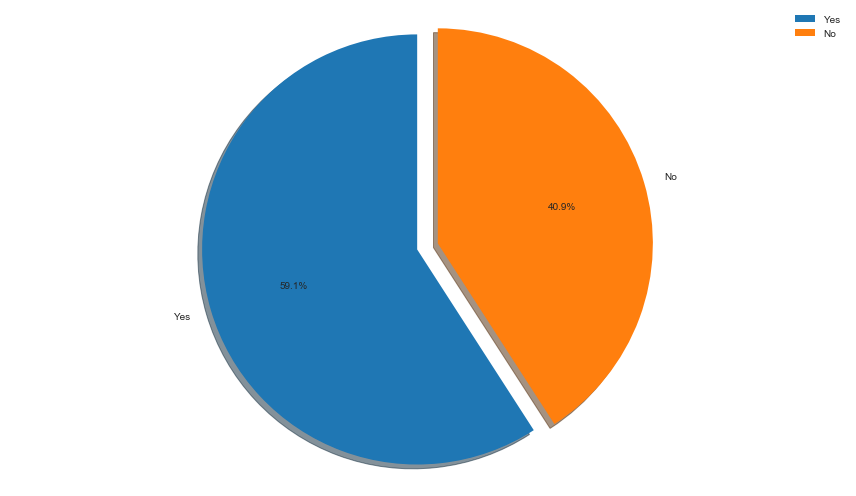

In [28]:
# This graph will give us a visual of how many customers were single and how many were married
# label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Marital_Status'].value_counts(),explode=explode, labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle, like in our previous pie charts

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

- It is clear the advantage of marketing to married people as they accounted for 60% of sales in the data set.

# 5 | Long-Term Potential

Many people travel in order to purchase items not available near to where they live.  Luckily this data set contains information on whether the customers are locals and how long they have been locals.  This will help to determine where to focus marketing efforts and how volatile these customer markets are.  

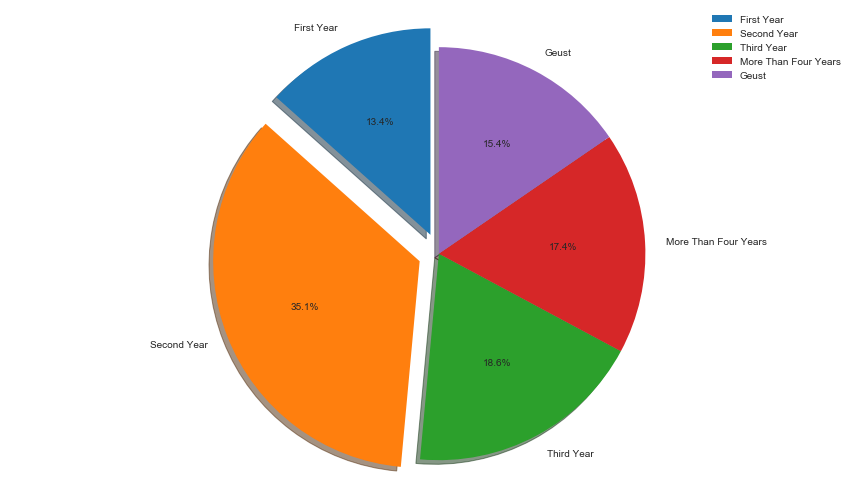

In [29]:
# We will create labels for how long the customer has been local. and chart it to see where are sales are coming from.

labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio as we have done before.

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

- Interesting to note the drastic number of consumers that are in their second year of being local.
- People in their first and second year in the city make up for about half of the sales on Black friday.

# Scatterplots


To understand the data more and remopve outliers I want to visualize any outliers.

In [30]:
data_scatter = data.groupby(by=“User_ID”).agg({“spend”: “sum”, “spend”: “mean”, “price”: “mean”})

SyntaxError: invalid character in identifier (<ipython-input-30-648a1d58d859>, line 1)

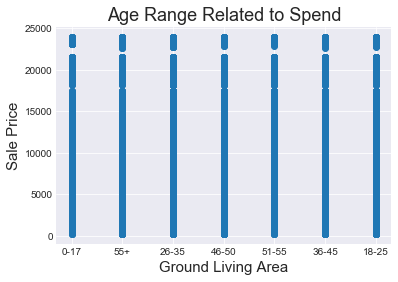

In [31]:
# First I want to explore outliers, 
#as it was the first cleaning we covered in class
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
# ^ This kernel helped me learn a lot about cleaning data 
# the dataset page says that a plot of sale price and gr liv area will quickly help
# someoen determine 5 data points that should be removed, so let's do that
fig, outlier_discovery = plt.subplots()
outlier_discovery.scatter(x=data['Age'], y=data['Purchase'])
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Ground Living Area' , fontsize=15)
plt.title ('Age Range Related to Spend', fontsize = 18)
plt.show()

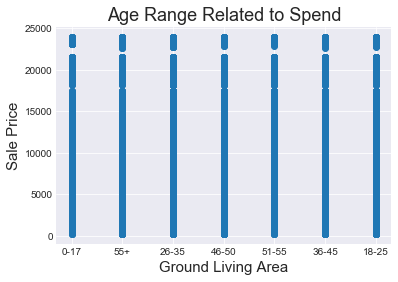

In [32]:
# unhbgvghjkvtycf
fig, outlier_discovery = plt.subplots()
outlier_discovery.scatter(x=data['Age'], y=data['Purchase'])
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('Ground Living Area' , fontsize=15)
plt.title ('Age Range Related to Spend', fontsize = 18)
plt.show()

# CLAW here is some code for you


In [34]:
# remove P

data[productID] = data[productID].map(lambda x: x.lstrip(“P”))

SyntaxError: invalid character in identifier (<ipython-input-34-6fc58eed5f5a>, line 3)

combining people is really hard I will finalize it now as i go to more work with wifi now that I am at grandpas, lay the groundworlk